In [1]:
# import all necessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('E:/Machine Learning/NED_Machine_Learning/Kaggle_Data/train.csv',nrows=50000)

In [3]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
#Number of rows
print('Number of Rows: ', len(df_train['target']))
df_train.head()

('Number of Rows: ', 50000)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
# In case you get error while importing h2o,run it again until you get cluster running
import h2o
h2o.init(max_mem_size='6g')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.152-b16, mixed mode)
  Starting server from C:\Anaconda2\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\mudass~1\appdata\local\temp\tmpvs2bms
  JVM stdout: c:\users\mudass~1\appdata\local\temp\tmpvs2bms\h2o_Mudassar_Umar_started_from_python.out
  JVM stderr: c:\users\mudass~1\appdata\local\temp\tmpvs2bms\h2o_Mudassar_Umar_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,05 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,5 months and 28 days !!!
H2O cluster name:,H2O_from_python_Mudassar_Umar_nc700c
H2O cluster total nodes:,1
H2O cluster free memory:,5.333 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [6]:
# The data is imported to h2o data frame from pandas data frame
hdf = h2o.H2OFrame(df_train)

# Class labels is converted to binary values
hdf['target']= hdf['target'].asfactor()
# split data in training, testing and validation set with 60,20,20
hdf_train, hdf_validate, hdf_test = hdf.split_frame([0.60,0.20], seed=100)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
# feature set to be used while training Neural network
input_col = hdf.col_names
input_col.remove('target')
print(input_col)

[u'id', u'ps_ind_01', u'ps_ind_02_cat', u'ps_ind_03', u'ps_ind_04_cat', u'ps_ind_05_cat', u'ps_ind_06_bin', u'ps_ind_07_bin', u'ps_ind_08_bin', u'ps_ind_09_bin', u'ps_ind_10_bin', u'ps_ind_11_bin', u'ps_ind_12_bin', u'ps_ind_13_bin', u'ps_ind_14', u'ps_ind_15', u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_reg_01', u'ps_reg_02', u'ps_reg_03', u'ps_car_01_cat', u'ps_car_02_cat', u'ps_car_03_cat', u'ps_car_04_cat', u'ps_car_05_cat', u'ps_car_06_cat', u'ps_car_07_cat', u'ps_car_08_cat', u'ps_car_09_cat', u'ps_car_10_cat', u'ps_car_11_cat', u'ps_car_11', u'ps_car_12', u'ps_car_13', u'ps_car_14', u'ps_car_15', u'ps_calc_01', u'ps_calc_02', u'ps_calc_03', u'ps_calc_04', u'ps_calc_05', u'ps_calc_06', u'ps_calc_07', u'ps_calc_08', u'ps_calc_09', u'ps_calc_10', u'ps_calc_11', u'ps_calc_12', u'ps_calc_13', u'ps_calc_14', u'ps_calc_15_bin', u'ps_calc_16_bin', u'ps_calc_17_bin', u'ps_calc_18_bin', u'ps_calc_19_bin', u'ps_calc_20_bin']


In [8]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [9]:
dl = H2ODeepLearningEstimator(seed =1,  hidden=[10,10], epochs =11, l2= 0.7, 
                              activation = 'MaxoutWithDropout', distribution = 'AUTO')
dl.train(x =input_col, y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


('Train accuracy:', 0.5)
('valid accuracy:', 0.5)


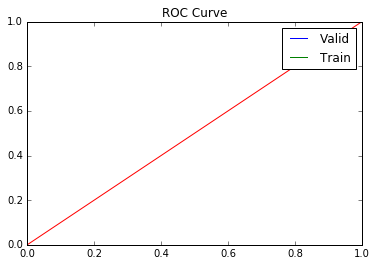

In [10]:
def model_performance(model):
    print('Train accuracy:', model.auc(train=True))
    print('valid accuracy:', model.auc(valid=True))

    roc_valid = model.roc(valid=True)
    roc_train= model.roc()

    plt.plot(roc_valid[0],roc_valid[1])
    plt.plot(roc_train[0],roc_train[1])
    plt.plot(np.arange(0.0,1.1,0.1),np.arange(0.0,1.1,0.1))
    
    plt.title('ROC Curve')
    plt.legend(['Valid','Train'])
    plt.show()

model_performance(dl)

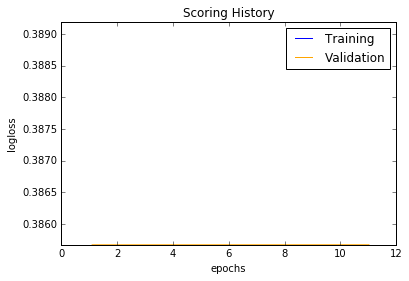

In [11]:
dl.plot()